# ANOVA  - Lab

## Introduction

In this lab, you'll get some brief practice generating an ANOVA table (AOV) and interpreting its output. You'll also perform some investigations to compare the method to the t-tests you previously employed to conduct hypothesis testing.

## Objectives

In this lab you will: 

- Use ANOVA for testing multiple pairwise comparisons 
- Interpret results of an ANOVA and compare them to a t-test

## Load the data

Start by loading in the data stored in the file `'ToothGrowth.csv'`: 

In [2]:
# Your code here
import pandas as pd
df= pd.read_csv('ToothGrowth.csv')

In [3]:
df.head()


,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


## Generate the ANOVA table

Now generate an ANOVA table in order to analyze the influence of the medication and dosage:  

In [4]:
df.describe()

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


In [5]:
df['supp'].unique()

array(['VC', 'OJ'], dtype=object)

In [6]:
df['dose'].unique()

array([0.5, 1. , 2. ])

In [7]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
df.head(2)

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5


In [9]:
#draft , WIP
# trying with a very simple example of linear relationship

df2=pd.DataFrame([[1,2,3],[3,4,7],[5,6,11.01],[1,2,3.01],[3,4.01,7],[5,6,11],[1.01,2,3],[3.01,4,7],[5,6.01,11]])
df2.columns = (['a','b','c'])
print(df2)
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula2 = 'c ~ a + b' 
lm2 = ols(formula2,df2).fit()  # create a model from a formula and a data frame
# OLS stands for Ordinary Least Square

print('\n','model- model- model- model- model- model- model- model- model')
print(lm2.summary())

table2= sm.stats.anova_lm(lm2,typ=2)
print('\n','ANOVA table- ANOVA table- ANOVA table- ANOVA table- ANOVA table- ANOVA table')
print(table2)

      a     b      c
0  1.00  2.00   3.00
1  3.00  4.00   7.00
2  5.00  6.00  11.01
3  1.00  2.00   3.01
4  3.00  4.01   7.00
5  5.00  6.00  11.00
6  1.01  2.00   3.00
7  3.01  4.00   7.00
8  5.00  6.01  11.00

 model- model- model- model- model- model- model- model- model
                            OLS Regression Results                            
Dep. Variable:                      c   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.184e+05
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           1.94e-16
Time:                        11:05:29   Log-Likelihood:                 30.847
No. Observations:                   9   AIC:                            -55.69
Df Residuals:                       6   BIC:                            -55.10
Df Model:                           2                                         
Covariance Type

C:\Users\poari\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [10]:
# Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'len ~ C(supp) + C(dose)' # 'supp' and 'dose' are categorical variables
lm = ols(formula,df).fit()  # create a model from a formula and a data frame
# OLS stands for Ordinary Least Square
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    len   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     59.88
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           1.78e-17
Time:                        11:05:29   Log-Likelihood:                -163.60
No. Observations:                  60   AIC:                             335.2
Df Residuals:                      56   BIC:                             343.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.4550      0.988     12.

## Interpretation

R-squared:  percentage of the variation in dependent variable that is explained by independent variables
Adj. R-squared: R-squared adjusted for the number of variables in the regression

Prob (F-statistic): null hypothesis = “all the regression coefficients are equal to zero”. 
                    Prob(F-statistics) = probability of null hypothesis being true.
Log-Likelihood:
AIC:   Akaike’s Information Criteria. A lower AIC implies a better model
BIC:   Bayesian Information Criteria. Penalties are more severe than for AIC

Prob(Omnibus): null hypothesis for OLS = errors are normally distributed = assumption of OLS
                Prob(Omnibus) close to 1 = null hypothesis is true => Best Linear Unbiased Estimators (BLUE)
                Here, null hypothesis is not true (0.164) => not BLUE
                
Prob(Jarque-Bera): in line with the Omnibus test. A large (?) value of JB test means the errors are not normally distributed                
Durbin-Watson: tests another assumption of OLS: homoscedasticity i.e. variance of error terms is constant and does not depend
                on the x-value. Value between 1 and 2 = good
                


In [11]:
table= sm.stats.anova_lm(lm,typ=2)
print(table)

               sum_sq    df          F        PR(>F)
C(supp)    205.350000   1.0  14.016638  4.292793e-04
C(dose)   2426.434333   2.0  82.810935  1.871163e-17
Residual   820.425000  56.0        NaN           NaN


## Interpret the output

Make a brief comment regarding the statistics and the effect of supplement and dosage on tooth length: 

## interpretation
For now, focus on the outermost columns. On the left, you can see our various groups (supp and dose)  and on the right, the probability that the factor is indeed influential. Values less than 0.05 (or whatever we set  𝛼  to) indicate rejection of the null hypothesis( H0= the tested variable is not influential). In this case, notice that both factors appear influential,

In [12]:
# Your comment here
# Both dose and supplement type are impactful. At first glance, dosage seems to be the more impactful of the two.

## Compare to t-tests

Now that you've had a chance to generate an ANOVA table, its interesting to compare the results to those from the t-tests you were working with earlier. With that, start by breaking the data into two samples: those given the OJ supplement, and those given the VC supplement. Afterward, you'll conduct a t-test to compare the tooth length of these two different samples: 

In [13]:
df.head(2)

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5


In [14]:
df_VC=df.loc[df['supp'] == 'VC']
df_OJ=df.loc[df['supp'] == 'OJ']
print(df_VC.head(3),df_OJ.head(3))
print(df.shape,df_OJ.shape, df_VC.shape)


    len supp  dose
0   4.2   VC   0.5
1  11.5   VC   0.5
2   7.3   VC   0.5      len supp  dose
30  15.2   OJ   0.5
31  21.5   OJ   0.5
32  17.6   OJ   0.5
(60, 3) (30, 3) (30, 3)


Now run a t-test between these two groups and print the associated two-sided p-value: 

In [15]:
# Calculate the 2-sided p-value for a t-test comparing the two supplement groups

# Note: '2-sided' means '2-tailed'

# 1.  H0: Null Hypothesis: the supplement does not influence len. i.e. mean of len is the same for df_OJ and df_VC.
# 2.  significance level = alpha = 0.05
# 3.  t-statistic

import scipy.stats as stats
import numpy as np

sample_OJ=list(df_OJ['len'])
print(sample_OJ)
sample_VC =  list(df_VC['len'])
print(sample_VC)
mean_smpl_OJ=np.mean(sample_OJ)
var_smpl_OJ=np.var(sample_OJ,ddof=1)
mean_smpl_VC=np.mean(sample_VC)
var_smpl_VC=np.var(sample_VC,ddof=1)
print(mean_smpl_OJ,var_smpl_OJ,mean_smpl_VC,mean_smpl_VC)


# variances of the 2 samples are diffferent => Need to prerform a Welch's test

denom = np.sqrt((var_smpl_OJ/30) + (var_smpl_VC/30))
t_statistic = np.abs(mean_smpl_OJ-mean_smpl_VC) / denom
print('t_statistic: ', t_statistic)

dof_numer=((var_smpl_OJ/30) + (var_smpl_VC/30))**2
dof_denom = (var_smpl_OJ**2)/((30**2)*29) + (var_smpl_VC**2)/((30**2)*29)
dof=dof_numer/dof_denom
p_value= 2*(1- stats.t.cdf(t_statistic , df=dof))  # multiplication by 2 because 2-tailed test
print('p_value :',p_value)

# alpha =5% means that the H0 rejection area is 2.5% on the high side + 2.5% on the low side
t_critical =  stats.t.ppf(.975 , df=dof)
print('t_critical (corresponding to significance level apha): ', t_critical)

auto_t_statistic, auto_p_value = stats.ttest_ind(sample_OJ,sample_VC,equal_var=False)
# equal_var
# If True (default), perform a standard independent 2 sample test that assumes equal population variances
# If False, perform Welch’s t-test, which does not assume equal population variance

print('auto_t_statistic :',  auto_t_statistic)
print('auto_p_value :', auto_p_value )



[15.2, 21.5, 17.6, 9.7, 14.5, 10.0, 8.2, 9.4, 16.5, 9.7, 19.7, 23.3, 23.6, 26.4, 20.0, 25.2, 25.8, 21.2, 14.5, 27.3, 25.5, 26.4, 22.4, 24.5, 24.8, 30.9, 26.4, 27.3, 29.4, 23.0]
[4.2, 11.5, 7.3, 5.8, 6.4, 10.0, 11.2, 11.2, 5.2, 7.0, 16.5, 16.5, 15.2, 17.3, 22.5, 17.3, 13.6, 14.5, 18.8, 15.5, 23.6, 18.5, 33.9, 25.5, 26.4, 32.5, 26.7, 21.5, 23.3, 29.5]
20.663333333333334 43.6334367816092 16.96333333333333 16.96333333333333
t_statistic:  1.91526826869527
p_value : 0.06063450788093383
t_critical (corresponding to significance level apha):  2.00379280436813
auto_t_statistic : 1.91526826869527
auto_p_value : 0.06063450788093387


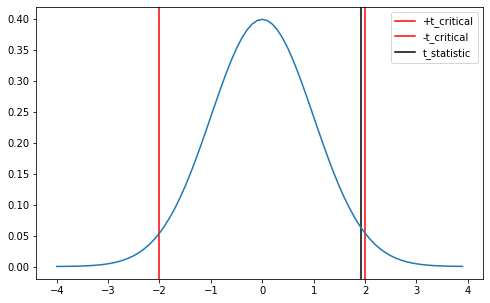

In [16]:
# Visualization


plt.figure(figsize=(8,5))
x=np.arange(-4,4,.1)
y=stats.norm.pdf(x=x)
plt.axvline(x=t_critical, label='+t_critical',color='r')
plt.axvline(x=-t_critical, label='-t_critical',color='r')

plt.axvline(x=t_statistic, label='t_statistic',color='black')

plt.plot(x,y)
plt.legend()
plt.show();


## interpretation
t_statistic is too low. ie p-value .06 is above significance level .05. So, we cannot reject the Null Hypothesis
So, the 2 samples come from the same distribution. THere is no statistically significant diffeence between the means of the OJ and VC samples
!!!!!!!!!!!????????
The ANOVA test concluded that supp (OC or VJ) was an impactful parameter. Contradiction?

## A 2-Category ANOVA F-test is equivalent to a 2-tailed t-test!

Now, recalculate an ANOVA F-test with only the supplement variable. An ANOVA F-test between two categories is the same as performing a 2-tailed t-test! So, the p-value in the table should be identical to your calculation above.

> Note: there may be a small fractional difference (>0.001) between the two values due to a rounding error between implementations. 

In [17]:
# Your code here; conduct an ANOVA F-test of the oj and vc supplement groups.
# Compare the p-value to that of the t-test above. 
# They should match (there may be a tiny fractional difference due to rounding errors in varying implementations)
formula= 'len ~ C(supp)'
lm = ols(formula,df).fit()
print(lm.summary())
table= sm.stats.anova_lm(lm,typ=2)
print(table)

                            OLS Regression Results                            
Dep. Variable:                    len   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     3.668
Date:                Mon, 16 Mar 2020   Prob (F-statistic):             0.0604
Time:                        11:05:31   Log-Likelihood:                -204.87
No. Observations:                  60   AIC:                             413.7
Df Residuals:                      58   BIC:                             417.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        20.6633      1.366     15.127

In [18]:
# Indeed, an ANOVA F-test is the same as a 2-sided Welch's t-test when comparing 2 samples.
# but I still don't understand how 2 samples corresponding to 2 distinct values of a predictor variable have the same mean.
# (C(supp) has a linear regression coefficient of -3.7 )

16.96333333333333 20.663333333333334


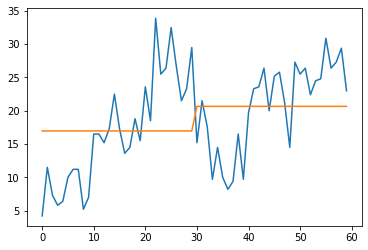

In [42]:
# test of the formula found through OLS linear regression
dft=df.copy()
dft['temp'] = 'VC'
dft
dft['supp_bin'] = (dft['supp'] == dft['temp'])
dft['formula'] = 20.663 -3.7 * dft['supp_bin']
plt.plot(dft.index,dft['len'])
plt.plot(dft.index,dft['formula'])
print(mean_smpl_VC,mean_smpl_OJ)

In [61]:
# ok, so, maybe the variation between the 'OJ' and 'VC' means for len(gth) is not big enough 
# to be statistically different even if VC/OJ is identified as a predictor of len(gth)
# Let's add a constant value to the OJ sample and try again the t-test and the ANOVA test.

# automatic test

df2_OJ = df_OJ.copy()
df2_OJ['len']=df2_OJ['len'] + 3
sample2_OJ=list(df2_OJ['len'])

print(sample_OJ, sample2_OJ)

auto2_t_statistic, auto2_p_value = stats.ttest_ind(sample2_OJ,sample_VC,equal_var=False)
# equal_var
# If True (default), perform a standard independent 2 sample test that assumes equal population variances
# If False, perform Welch’s t-test, which does not assume equal population variance

print('auto2_t_statistic :',  auto2_t_statistic)
print('auto2_p_value :', auto2_p_value )

[15.2, 21.5, 17.6, 9.7, 14.5, 10.0, 8.2, 9.4, 16.5, 9.7, 19.7, 23.3, 23.6, 26.4, 20.0, 25.2, 25.8, 21.2, 14.5, 27.3, 25.5, 26.4, 22.4, 24.5, 24.8, 30.9, 26.4, 27.3, 29.4, 23.0] [18.2, 24.5, 20.6, 12.7, 17.5, 13.0, 11.2, 12.4, 19.5, 12.7, 22.7, 26.3, 26.6, 29.4, 23.0, 28.2, 28.8, 24.2, 17.5, 30.3, 28.5, 29.4, 25.4, 27.5, 27.8, 33.9, 29.4, 30.3, 32.4, 26.0]
auto2_t_statistic : 3.468188486556293
auto2_p_value : 0.0010219677397910409


In [60]:
# 'manual' test

mean2_smpl_OJ=np.mean(sample2_OJ)
var2_smpl_OJ=np.var(sample2_OJ,ddof=1)

print(mean2_smpl_OJ,var2_smpl_OJ,mean_smpl_VC,mean_smpl_VC)


# variances of the 2 samples are diffferent => Need to prerform a Welch's test

denom = np.sqrt((var2_smpl_OJ/30) + (var_smpl_VC/30))
t_statistic = np.abs(mean2_smpl_OJ-mean_smpl_VC) / denom
print('t_statistic: ', t_statistic)

dof_numer=((var2_smpl_OJ/30) + (var_smpl_VC/30))**2
dof_denom = (var2_smpl_OJ**2)/((30**2)*29) + (var_smpl_VC**2)/((30**2)*29)
dof=dof_numer/dof_denom
p_value= 2*(1- stats.t.cdf(t_statistic , df=dof))  # multiplication by 2 because 2-tailed test
print('p_value :',p_value)

# alpha =5% means that the H0 rejection area is 2.5% on the high side + 2.5% on the low side
t_critical =  stats.t.ppf(.975 , df=dof)
print('t_critical (corresponding to significance level apha): ', t_critical)



23.663333333333323 43.6334367816092 16.96333333333333 16.96333333333333
t_statistic:  3.468188486556293
p_value : 0.0010219677397909077
t_critical (corresponding to significance level apha):  2.00379280436813


In [ ]:
# ok. It makes sense. with a slightly bigger diffrence in the means (of len(gth),
# we find a statistically significant difference 

In [70]:
# Now let's see if the regression coefficient for supp (OJ/VC) is bigger with the +3 added to OJ lengths
formula= 'len ~ C(supp)'
df3=df.copy()
df3['temp']= (df3['supp'] == 'OJ')

df3['len']=df3['len']+3*df3['temp']
df3

lm3 = ols(formula,df3).fit()
print(lm3.summary())
table3= sm.stats.anova_lm(lm3,typ=2)
print(table3)

                            OLS Regression Results                            
Dep. Variable:                    len   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     12.03
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           0.000994
Time:                        11:40:32   Log-Likelihood:                -204.87
No. Observations:                  60   AIC:                             413.7
Df Residuals:                      58   BIC:                             417.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.6633      1.366     17.323

In [ ]:
# YES HOURA! the coefficient for VC/OJ was changed  by -3 and the intercept too .IT makes sense

16.96333333333333 23.663333333333323


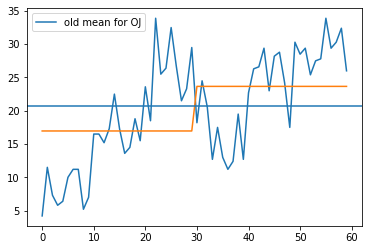

In [74]:
# visual test of the formula found through OLS linear regression
dft=df3.copy()
dft['temp'] = 'VC'
dft
dft['supp_bin'] = (dft['supp'] == dft['temp'])
dft['formula'] = 23.663 -6.7 * dft['supp_bin']
plt.plot(dft.index,dft['len'])
plt.plot(dft.index,dft['formula'])
plt.axhline(20.663333,label = 'old mean for OJ')
plt.legend()
print(mean_smpl_VC,mean2_smpl_OJ)

## Run multiple t-tests

While the 2-category ANOVA test is identical to a 2-tailed t-test, performing multiple t-tests leads to the multiple comparisons problem. To investigate this, look at the various sample groups you could create from the 2 features: 

In [111]:
df.head()
# supp = OJ or VC
#dose = 0.5 or 1 or 2
# for group in df.groupby(['supp', 'dose'])['len']:
#     print(group)

listo= list(df.groupby(['supp', 'dose'])['len'])
len(listo)
len(listo[2])
type(listo[2])
# listo is a list of 6 tuples. 
# each tuple corresponds to a combination of a distinct supp with a distinct dose (2*3 = 6)
# each tuple has 2 elements:
#     .the 1st element is a tuple corresponding to the combination: (supp value, dose value)  = group name
#     .the 2nd element is a pandas series of the old indeces and len for a combination (supp,dose) = data
listo[5]


(('VC', 2.0), 20    23.6
 21    18.5
 22    33.9
 23    25.5
 24    26.4
 25    32.5
 26    26.7
 27    21.5
 28    23.3
 29    29.5
 Name: len, dtype: float64)

In [114]:
for group in df.groupby(['supp', 'dose'])['len']:
    group_name = group[0]
    data = group[1]
    print(group_name)
#     print(data)

('OJ', 0.5)
('OJ', 1.0)
('OJ', 2.0)
('VC', 0.5)
('VC', 1.0)
('VC', 2.0)


While bad practice, examine the effects of calculating multiple t-tests with the various combinations of these. To do this, generate all combinations of the above groups. For each pairwise combination, calculate the p-value of a 2-sided t-test. Print the group combinations and their associated p-value for the two-sided t-test.

In [149]:
# Your code here; reuse your t-test code above to calculate the p-value for a 2-sided t-test
# for all combinations of the supplement-dose groups listed above. 
# (Since there isn't a control group, compare each group to every other group.)

from itertools import combinations

groups= [group[0] for group in df.groupby(['supp','dose'])['len']]
combos = combinations(groups,2) 
# generates all the combinations of 2 groups 
# that makes 6!/(4!2!) = 6*5/2 = 15
# tt = list(combos)
# print(tt)
# list(combos) is a list of 15 tuples. each tuple is made of a pair of tuple corresponding to a pair of groups (supp,dose)

for combo in combos:
    supp1 = combo[0][0]
    dose1 = combo[0][1]
    supp2 = combo[1][0]
    dose2 = combo[1][1]
    sample1 = df.loc[(df['supp'] == supp1) & (df['dose'] == dose1)]
    sample2 = df.loc[(df['supp'] == supp2) & (df['dose'] == dose2)]
# sample 1 and sample 2 are pandas series
    res = stats.ttest_ind(sample1['len'],sample2['len'],equal_var=False) # Welch's t-test
    print(combo, res[1])

  



(('OJ', 0.5), ('OJ', 1.0)) 8.784919055161479e-05
(('OJ', 0.5), ('OJ', 2.0)) 1.3237838776972294e-06
(('OJ', 0.5), ('VC', 0.5)) 0.006358606764096811
(('OJ', 0.5), ('VC', 1.0)) 0.046010332576375525
(('OJ', 0.5), ('VC', 2.0)) 7.196253524006043e-06
(('OJ', 1.0), ('OJ', 2.0)) 0.039195142046244
(('OJ', 1.0), ('VC', 0.5)) 3.65520673032591e-08
(('OJ', 1.0), ('VC', 1.0)) 0.001038375872299884
(('OJ', 1.0), ('VC', 2.0)) 0.09652612338267014
(('OJ', 2.0), ('VC', 0.5)) 1.3621396478988815e-11
(('OJ', 2.0), ('VC', 1.0)) 2.3610742020468437e-07
(('OJ', 2.0), ('VC', 2.0)) 0.9638515887233756
(('VC', 0.5), ('VC', 1.0)) 6.811017702865016e-07
(('VC', 0.5), ('VC', 2.0)) 4.6815774144921145e-08
(('VC', 1.0), ('VC', 2.0)) 9.155603056638692e-05


In [ ]:
    # Note that while ANOVA also concluded that all factors were significant, 
    # these p-values are substantially lower.

## Summary

In this lesson, you implemented the ANOVA technique to generalize testing methods to multiple groups and factors.